In [1]:
import os
import cv2
import numpy as np


images = []
labels = []

path = '/kaggle/input/standard-ocr-dataset/data/training_data'

dir_list = os.listdir(path)
for i in dir_list:
  dir = os.path.join(path, i)
  file_list = os.listdir(dir)
  for j in file_list:
    files = os.path.join(dir, j)
    img = cv2.imread(files)
    img = cv2.resize(img, (64,64))
    img = np.array(img, dtype=np.float32)
    img = img/255
    images.append(img)
    labels.append(i)


In [2]:
X = np.array(images)
len(X)

20628

In [3]:
X.shape

(20628, 64, 64, 3)

In [4]:
y = np.array(labels)
len(y)

20628

In [5]:
y.shape

(20628,)

In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [7]:
from sklearn.utils import shuffle
X_sh, y_sh = shuffle(X, y, random_state=42)

In [8]:
from keras.models import Sequential
from keras.layers import Conv2D, Flatten, MaxPooling2D, Dense

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [9]:
model = Sequential()

In [10]:
model.add(Conv2D(filters=16, kernel_size=(3,3), activation='relu', input_shape=(64,64,3)))
model.add(MaxPooling2D())
model.add(Conv2D(filters=32, kernel_size=(3,3),  activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(filters=64, kernel_size=(3,3),  activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=36, activation='softmax'))

In [11]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics = ['accuracy'])

In [12]:
history = model.fit(X_sh, y_sh ,validation_split=0.2, batch_size=25, epochs=10)

Epoch 1/10
661/661 [==============================] - 15s 7ms/step - loss: 0.8105 - accuracy: 0.7780 - val_loss: 0.2670 - val_accuracy: 0.9273
Epoch 2/10
661/661 [==============================] - 4s 6ms/step - loss: 0.2000 - accuracy: 0.9396 - val_loss: 0.1896 - val_accuracy: 0.9426
Epoch 3/10
661/661 [==============================] - 4s 6ms/step - loss: 0.1385 - accuracy: 0.9539 - val_loss: 0.2269 - val_accuracy: 0.9421
Epoch 4/10
661/661 [==============================] - 4s 6ms/step - loss: 0.1115 - accuracy: 0.9604 - val_loss: 0.1648 - val_accuracy: 0.9544
Epoch 5/10
661/661 [==============================] - 4s 6ms/step - loss: 0.0802 - accuracy: 0.9699 - val_loss: 0.1390 - val_accuracy: 0.9622
Epoch 6/10
661/661 [==============================] - 5s 7ms/step - loss: 0.0764 - accuracy: 0.9701 - val_loss: 0.1634 - val_accuracy: 0.9571
Epoch 7/10
661/661 [==============================] - 4s 6ms/step - loss: 0.0675 - accuracy: 0.9740 - val_loss: 0.1620 - val_accuracy: 0.9612
Epoch

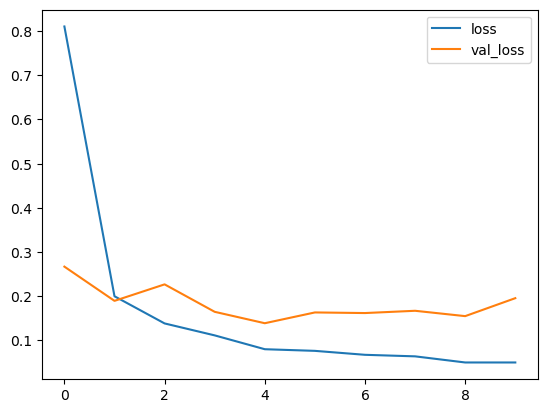

In [13]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])

In [14]:
test_images = []
test_labels = []

path = '/kaggle/input/standard-ocr-dataset/data/testing_data'

dir_list = os.listdir(path)
for i in dir_list:
  dir = os.path.join(path, i)
  file_list = os.listdir(dir)
  for j in file_list:
    files = os.path.join(dir, j)
    img = cv2.imread(files)
    img = cv2.resize(img, (64,64))
    img = np.array(img, dtype=np.float32)
    img = img/255
    test_images.append(img)
    test_labels.append(i)


In [15]:
X_test = np.array(test_images)
y_test = np.array(test_labels)

In [16]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_test = le.fit_transform(y_test)

In [17]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)

32/32 [==============================] - 0s 8ms/step - loss: 0.0415 - accuracy: 0.9821


In [18]:
print(test_loss,test_accuracy )

0.04151330515742302 0.9821428656578064
